In [90]:
import matplotlib.pyplot as plt
from pathlib import Path
import math
import pickle as pkl
import numpy as np
from matplotlib import cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
variables = {
    "n_estimators": [10, 12, 14, 16],
    "classes": [
        ["DrDoS_DNS", "BENIGN"],
        ["DrDoS_NetBIOS", "DrDoS_SSDP", "TFTP"],
        ["DrDoS_LDAP", "DrDoS_DNS", "DrDoS_NTP", "DrDoS_MSSQL"],
    ],
    "samples": [1000, 2000, 3000, 4000],
}

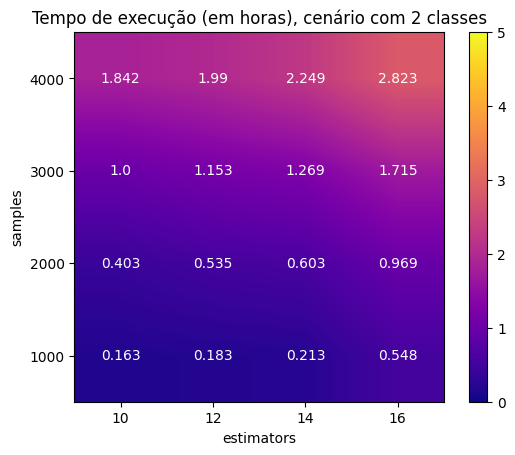

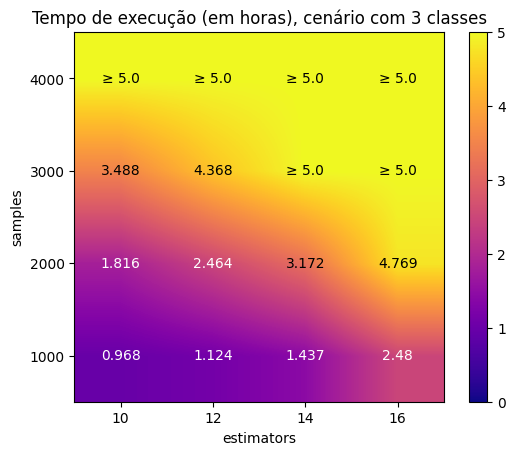

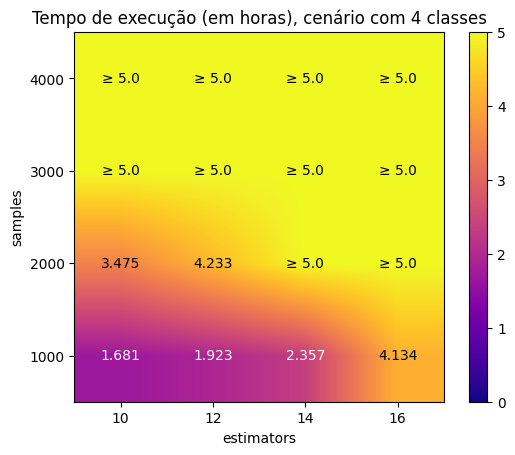

In [108]:
samples = variables['samples']
n_estimators = variables['n_estimators']

for classes in variables['classes']:
    classes_path = Path(
        f"out/{'-'.join(classes)}/"
    )

    rows = []

    for sample in samples:
        columns = []
        for estimator in n_estimators:
            path = Path(f"out/{'-'.join(classes)}/{estimator}_estimators/{sample}_samples/")
            if not path.exists() or Path(path, 'skipped').exists():
                columns.append(5)
                continue
            with open(Path(path, 'model.pkl'), 'rb') as f:
                model = pkl.load(f)
            with open(Path(path, 'net.pkl'), 'rb') as f:
                net = pkl.load(f)
            columns.append(net['elapsed_time'] / 3600)
        rows.append(columns)

    data = np.clip(rows, 0, 5)

    fig, ax = plt.subplots()

    ax.set_yticks(range(len(samples)), labels=samples)
    ax.set_ylabel('samples')

    ax.set_xticks(range(len(n_estimators)), labels=n_estimators)
    ax.set_xlabel('estimators')

    ax.set_title(f'Tempo de execução (em horas), cenário com {len(classes)} classes')

    pos = ax.imshow(data, origin='lower', vmin=0, vmax=5, cmap=cm.plasma, interpolation="bilinear")

    fig.colorbar(pos, ax=ax)

    for i in range(len(samples)):
        for j in range(len(n_estimators)):
            value = data[i, j]
            rgba = cm.plasma(colors.Normalize(vmin=0, vmax=5)(value))

            luminance = 0.2126 * rgba[0] + 0.7152 * rgba[1] + 0.0722 * rgba[2]

            text_color = "black" if luminance > 0.5 else "white"

            ax.text(j, i, round(value, 3) if value < 5 else '≥ 5.0', ha='center', va='center', color=text_color)

    plt.show()

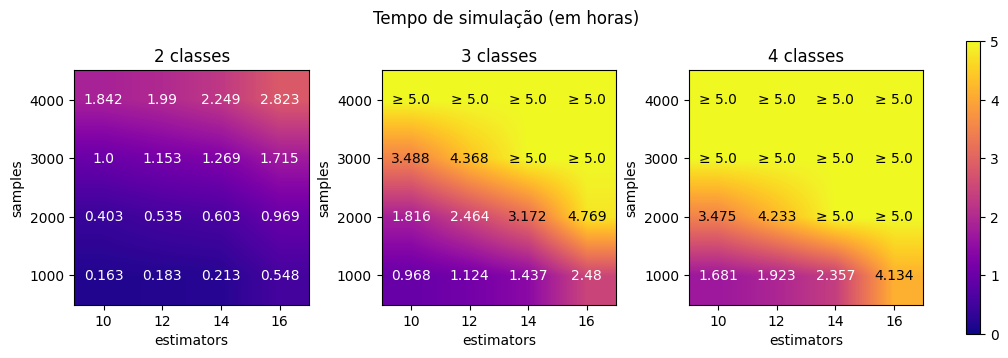

In [109]:
samples = variables["samples"]
n_estimators = variables["n_estimators"]


fig, axs = plt.subplots(1, 3, figsize=(10, 3.5), constrained_layout=True)

for ax_i, classes in enumerate(variables["classes"]):
    classes_path = Path(f"out/{'-'.join(classes)}/")

    rows = []
    for sample in samples:
        columns = []
        for estimator in n_estimators:
            path = Path(
                f"out/{'-'.join(classes)}/{estimator}_estimators/{sample}_samples/"
            )
            if not path.exists() or Path(path, "skipped").exists():
                columns.append(5)
                continue
            with open(Path(path, "model.pkl"), "rb") as f:
                model = pkl.load(f)
            with open(Path(path, "net.pkl"), "rb") as f:
                net = pkl.load(f)
            columns.append(net["elapsed_time"] / 3600)
        rows.append(columns)

    data = np.clip(rows, 0, 5)

    ax = axs[ax_i]

    ax.set_yticks(range(len(samples)), labels=samples)
    ax.set_ylabel("samples")

    ax.set_xticks(range(len(n_estimators)), labels=n_estimators)
    ax.set_xlabel("estimators")

    ax.set_title(f"{len(classes)} classes")

    im = ax.imshow(
        data, origin="lower", vmin=0, vmax=5, cmap=cm.plasma, interpolation="bilinear"
    )

    for i in range(len(samples)):
        for j in range(len(n_estimators)):
            value = data[i, j]
            rgba = cm.plasma(colors.Normalize(vmin=0, vmax=5)(value))

            luminance = 0.2126 * rgba[0] + 0.7152 * rgba[1] + 0.0722 * rgba[2]

            text_color = "black" if luminance > 0.5 else "white"

            ax.text(
                j,
                i,
                round(value, 3) if value < 5 else "≥ 5.0",
                ha="center",
                va="center",
                color=text_color,
            )

fig.colorbar(im, ax=axs)
fig.suptitle("Tempo de simulação (em horas)")

plt.show()